In [11]:
# Validation

/var/folders/nf/tk1_dsm923q946nd2xz6z6g0nv_859/T/ipykernel_92227/2911587990.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(data_frames))


[33.79589841 19.22321474  9.57623293  4.48930915  5.5948361   8.53671181
 11.07224949 13.0845944  14.67091098 15.9297803  16.93902524]


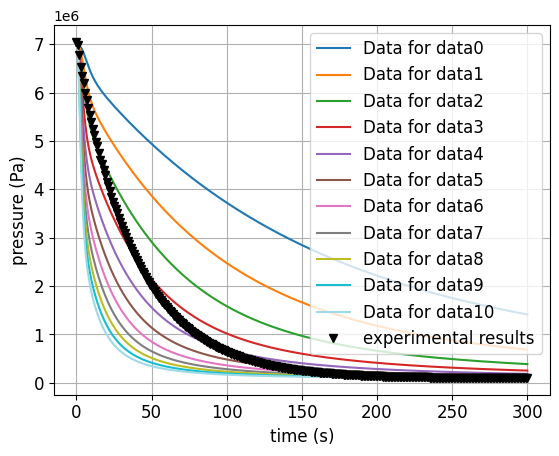

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create an empty dictionary to store the DataFrame
data_frames = {}
NARMSE = np.array([])
data20 = pd.read_csv('experimental_data.csv')

# Loop through numbers
for i in range(0, 11):
    filename = f'stochastic_tools_out_runner{i:02d}.csv' 
    data_frames[f'data{i}'] = pd.read_csv(filename)

# Function to compute Absolute Root Mean Square Error (ARMSE)
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

color_palette = plt.cm.get_cmap('tab20', len(data_frames))

# Plot the data for each DataFrame with different line colors
for idx, (key, df) in enumerate(data_frames.items()):
    plt.plot(df['time'], df['inlet-p'], color=color_palette(idx), label=f'Data for {key}', linestyle='-')
    # Compute the error between the plot and experimental data
    x_values = df['time']
    y_values = df['inlet-p']
    experimental_y_values = np.interp(x_values, data20['Time1'], data20['P_1'])
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    armse = compute_armse(y_values, experimental_y_values)/1e6 
    # Append the value to the NumPy array
    NARMSE = np.append(NARMSE, narmse) 


print(NARMSE)


plt.plot(data20['Time1'], data20['P_1'], 'v', color='k', label = 'experimental results')
plt.xlabel('time (s)', fontsize = 12)
# plt.xlim(0,45)
# plt.ylim(0, 7500000)
plt.ylabel('pressure (Pa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()


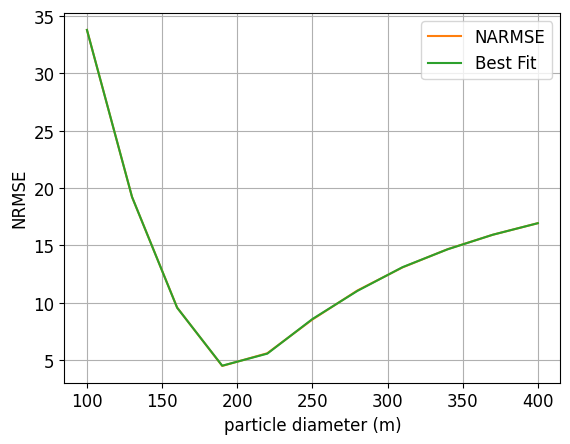

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

particle_diameter_1 = pd.read_csv('parameters.csv')*10e6

degree = 9# Degree of the polynomial
coefficients = np.polyfit(particle_diameter_1['particle_diameter_1'], NARMSE, degree)
poly_function = np.poly1d(coefficients)
y_fit = poly_function(particle_diameter_1['particle_diameter_1'])

plt.plot(particle_diameter_1['particle_diameter_1'], NARMSE, color='C1', label = 'NARMSE')
plt.plot(particle_diameter_1['particle_diameter_1'], y_fit, color='C2', label = 'Best Fit')
plt.xlabel('particle diameter (m)', fontsize = 12)
plt.ylabel('NRMSE', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()

In [14]:
best_fit = pd.read_csv('model_pellets_out.csv')
plt.plot(data20['time'], data20['1004_control_tube_1'], 'v', color='k', label = 'experimental results')
plt.plot(best_fit['time'], best_fit['inlet-p'], '.', color='C1', label = 'best fit')
plt.xlabel('time (s)', fontsize = 12)
plt.xlim(0,45)
plt.ylim(0, 7500000)
plt.ylabel('pressure (Pa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()

FileNotFoundError: [Errno 2] No such file or directory: 'model_pellets_out.csv'